In [28]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sn

In [29]:
# Read the CSV
heart = pd.read_csv("cleaned_cardio.csv")
heart.head()

,age,height,weight,ap_hi,ap_lo,cardio,BMI,gender_1,gender_2,cholesterol_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,50.0,66.0,136.0,110,80,0,21.948577,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,55.0,61.0,187.0,140,90,1,35.329481,1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,52.0,65.0,141.0,130,70,1,23.461065,1,0,0,...,1,1,0,0,1,0,1,0,1,0
3,48.0,67.0,180.0,150,100,1,28.188906,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4,48.0,61.0,123.0,100,60,0,23.238108,1,0,1,...,0,1,0,0,1,0,1,0,1,0


In [30]:
# Assign X (data) and y (target)
X = heart.drop("cardio", axis=1)
y = heart["cardio"].values.reshape(-1, 1)
print(X.shape, y.shape)

(68606, 20) (68606, 1)


In [31]:
# Set up train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
# Use standard scaler on  tarining data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [33]:
# Scale train and test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

from sklearn.preprocessing import LabelEncoder
y_train_encoded = LabelEncoder().fit_transform(y_train_scaled)
y_test_encoded = LabelEncoder().fit_transform(y_test_scaled)

C:\Users\kenda\anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
# Set up classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Fit and Compare
classifier.fit(X_train_scaled, y_train_encoded)
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test_encoded)}")

C:\Users\kenda\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Data Score: 0.7243946048898044
Testing Data Score: 0.7368819962686567


In [36]:
# Make Predictions
predictions = classifier.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test_encoded[:10].tolist()}")

First 10 Predictions:   [1 1 0 0 0 1 1 0 1 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 1, 1, 0, 1, 1]


In [37]:
# Display Predictions
pd.DataFrame({"Prediction": predictions, "Actual": y_test_encoded}).reset_index(drop=True)

,Prediction,Actual
0,1,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,1,1
7,0,0
8,1,1
9,0,1


In [38]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, predictions,
                            target_names=["negative", "positive"]))

              precision    recall  f1-score   support

    negative       0.71      0.80      0.75      8592
    positive       0.77      0.67      0.72      8560

    accuracy                           0.74     17152
   macro avg       0.74      0.74      0.74     17152
weighted avg       0.74      0.74      0.74     17152



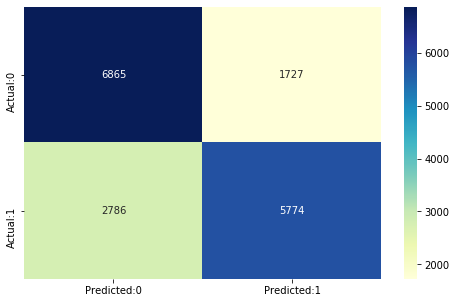

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_encoded,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")